In [359]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [361]:
df1 = pd.read_csv('Downloads/tmdb_genres.csv')
df2 = pd.read_csv('Downloads/tmdb_movies.csv')

In [363]:
df2.sort_values(by = 'vote_count')
q3 = np.percentile(df2['vote_count'], 75)
q3

737.0

In [365]:
top_10 = df2[df2['vote_count']>q3].nlargest(10,'vote_average')
top_10

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
65,65,185000000,http://thedarkknight.warnerbros.com/dvdsite/,155,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,2008-07-16,1004558444,152.0,Released,Why So Serious?,The Dark Knight,8.2,12002,18.0
690,690,60000000,http://thegreenmile.warnerbros.com/,497,en,The Green Mile,A supernatural tale set on death row in a Sout...,103.698022,1999-12-10,284600000,189.0,Released,Miracles do happen.,The Green Mile,8.2,4048,14.0


In [367]:
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')

In [369]:
filtered_years = df2[(df2['release_date'].dt.year >= 2010) & (df2['release_date'].dt.year <= 2016)]

In [371]:
grouped_data = filtered_years.groupby(filtered_years['release_date'].dt.year).agg(avg_revenue=('revenue', 'mean'),avg_budget=('budget', 'mean')).reset_index()
grouped_data.rename(columns={'release_date': 'year'})

,year,avg_revenue,avg_budget
0,2010,9.043811e+07,3.449541e+07
1,2011,9.200413e+07,3.477232e+07
2,2012,1.160659e+08,3.492203e+07
3,2013,1.013485e+08,3.552329e+07
4,2014,1.013466e+08,3.095989e+07
5,2015,1.054399e+08,3.113216e+07
6,2016,1.390496e+08,4.570327e+07


In [373]:
def million(x, pos):
        return 'PLN {:3.1f}M'.format(x*1e-6)

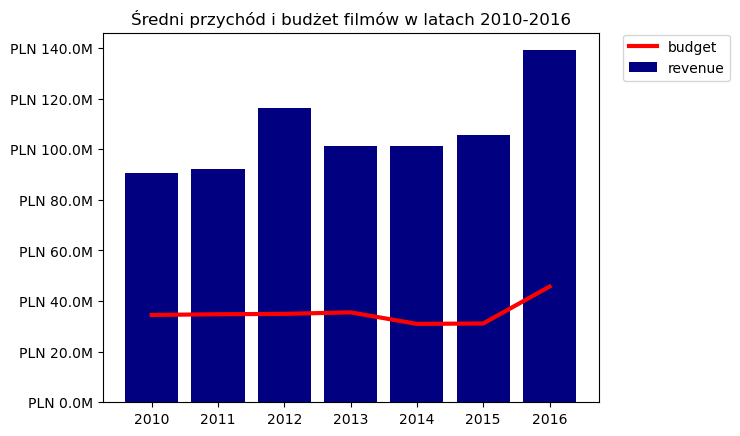

In [375]:
fig, ax = plt.subplots()
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
ax.bar(grouped_data['release_date'],grouped_data['avg_revenue'], color = 'navy', label='revenue')
ax.plot(grouped_data['release_date'], grouped_data['avg_budget'], color = 'red', linewidth=3, label='budget')
ax.legend(loc=(1.05,0.87))
ax.set_title('Średni przychód i budżet filmów w latach 2010-2016')
plt.show()

In [377]:
df1.columns=['number','genres']

In [379]:
merged_data = pd.merge(df2,df1, left_on = 'genre_id', right_on = 'number', how = 'outer')
merged_data.drop(['genre_id', 'number'], axis=1)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genres
0,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
1,8,250000000,http://harrypotter.warnerbros.com/harrypottera...,767,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,2009-07-07,933959197,153.0,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,Adventure
2,10,270000000,http://www.superman.com,1452,en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,2006-06-28,391081192,154.0,Released,NaN,Superman Returns,5.4,1400,Adventure
3,11,200000000,http://www.mgm.com/view/movie/234/Quantum-of-S...,10764,en,Quantum of Solace,Quantum of Solace continues the adventures of ...,107.928811,2008-10-30,586090727,106.0,Released,"For love, for hate, for justice, for revenge.",Quantum of Solace,6.1,2965,Adventure
4,12,200000000,http://disney.go.com/disneypictures/pirates/,58,en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,2006-06-20,1065659812,151.0,Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4674,0,NaN,194588,en,Short Cut to Nirvana: Kumbh Mela,Every 12 years over 70 million pilgrims gather...,0.004998,2004-05-11,0,85.0,Released,NaN,Short Cut to Nirvana: Kumbh Mela,0.0,0,NaN
4799,4681,0,http://www.realityshowthefilm.com/,176074,en,Reality Show,The Warwick family are unknowingly being filme...,0.472123,2015-01-01,0,92.0,Released,NaN,Reality Show,5.5,2,NaN
4800,4714,0,NaN,282128,en,An American in Hollywood,A talented young filmmaker from New York sets ...,0.015697,2014-07-18,0,89.0,Released,NaN,An American in Hollywood,0.0,0,NaN
4801,4716,0,NaN,38786,en,The Blood of My Brother: A Story of Death in Iraq,THE BLOOD OF MY BROTHER goes behind the scenes...,0.005256,2005-11-25,0,90.0,Released,NaN,The Blood of My Brother: A Story of Death in Iraq,0.0,0,NaN


In [381]:
merged_data['genres'].value_counts()[:1]

genres
Drama    1207
Name: count, dtype: int64

In [383]:
avg_runtime = merged_data.groupby('genres').agg(avg_runtime=('runtime', 'mean')).reset_index()
avg_runtime.nlargest(1,'avg_runtime')

,genres,avg_runtime
10,History,133.96


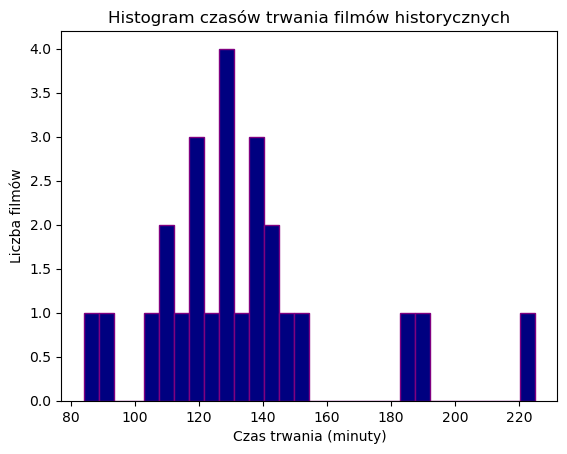

In [415]:
his_movie = merged_data['genres'] == 'History'
merged_data[his_movie == True]['runtime'].plot(kind='hist',bins=30, color = 'navy', edgecolor='purple')
plt.title('Histogram czasów trwania filmów historycznych')
plt.xlabel('Czas trwania (minuty)')
plt.ylabel('Liczba filmów')
plt.show()